In [1]:
import sys
#import Backtest
from GeneralBacktest import Backtest,Position,Bid
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
import pickle
import yfinance as yf
import pandas_ta as ta
#warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

In [4]:
data = pd.read_csv("test_data.csv",index_col = 0)
data.index = pd.to_datetime(data.index)

In [40]:
class TrendFollower:
    def __init__(self):
        return

        
    def get_trend(self,df):
        trend_1 = df.pct_change().mean(axis = 1).ewm(com=0.1).mean().rolling(15).mean()
        trend_2 = df.pct_change().mean(axis = 1).ewm(com=0.1).mean().rolling(30).mean()
        return trend_1[-1],trend_2[-1]
        
        
    
    def clear_positions(self,ti,df,positions):
        bid_list = []
        for pos in positions.values():
            bid = Bid(ticker = pos.ticker,shares = pos.shares,price = df.iloc[-1][pos.ticker],bid_type = 0)
            bid_list.append(bid)
        return bid_list
        
    def build_positions(self,ti,df,cash,positions):
        bid_list = []
        for ticker in df.columns:
            price = df.iloc[-1][ticker]
            shares = cash/len(df.columns)//price
            bid = Bid(ticker = ticker,shares = shares,price = price,bid_type = 1)
            bid_list.append(bid)
        return bid_list
    
    
        
    def predict(self,ti,df,positions,cash,full_data):

        bid_list = []
        fast, slow = self.get_trend(df)

        if fast < -0.005:
            if len(positions) > 0:
                print(fast)
                bid_list+=self.clear_positions(ti,df,positions)
                return bid_list
                    
    
        if slow > 0.0005:
            if len(positions) == 0:
                print(slow)
                bid_list += self.build_positions(ti,df,cash,positions)


        
        return bid_list
            
        

# Load sample data

In [41]:

tf = TrendFollower()
macd_bt = Backtest(data, tf)
macd_bt.backtest_full()

====================Start====================
0.0011897201415583057
#shares of 0.0 is invaild
-0.006927939952091439
0.0012820979327645878
#shares of 0.0 is invaild
-0.005905814115856721
0.0019278913437790622
#shares of 0.0 is invaild
-0.005648935333794978
Finished, Final Return = 0.6211


# After backtest, check all historical transactions with transaction_history, a dataframe that recorded each bid, its transaction cost and pnl.

In [42]:
macd_bt.transaction_history

,dt,ticker,type,price,shares,amount,transaction_cost,pnl
0,2019-05-02,AAPL,1,50.767139,19.0,964.575649,0.0,0.000000
1,2019-05-02,ABBV,1,66.972214,14.0,937.610992,0.0,0.000000
2,2019-05-02,ABT,1,74.888840,13.0,973.554916,0.0,0.000000
3,2019-05-02,ACN,1,172.078598,5.0,860.392990,0.0,0.000000
4,2019-05-02,ADBE,1,279.640015,3.0,838.920044,0.0,0.000000
...,...,...,...,...,...,...,...,...
589,2022-09-06,VZ,0,40.418823,37.0,1495.496460,0.0,-138.633698
590,2022-09-06,WBA,0,35.320000,42.0,1483.439987,0.0,-144.453987
591,2022-09-06,WFC,0,42.880001,38.0,1629.440041,0.0,-20.186630
592,2022-09-06,WMT,0,132.339996,13.0,1720.419952,0.0,81.886253


<AxesSubplot:>

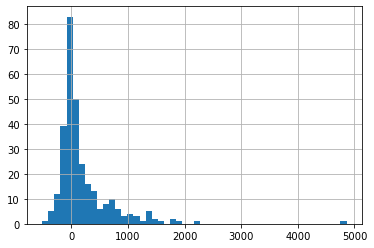

In [43]:
#histogram of pnl
macd_bt.transaction_history[macd_bt.transaction_history.type ==0]['pnl'].hist(bins = 50)

# The portfolio_tracker records the # of bids, length of positions, cash value, position value, total value at each ti. 
# The bah column is the value assuming we buy all the tickers when it begins

In [44]:
macd_bt.portfolio_tracker

,dt,bid_count,position_count,cash_value,positions_value,total_value,bah
0,2019-03-20,0,0,100000.000000,0.0,100000.000000,100000.000000
1,2019-03-21,0,0,100000.000000,0.0,100000.000000,100954.473649
2,2019-03-22,0,0,100000.000000,0.0,100000.000000,99110.452320
3,2019-03-25,0,0,100000.000000,0.0,100000.000000,99028.807052
4,2019-03-26,0,0,100000.000000,0.0,100000.000000,99948.807689
...,...,...,...,...,...,...,...
891,2022-09-30,0,0,162107.448095,0.0,162107.448095,145482.006651
892,2022-10-03,0,0,162107.448095,0.0,162107.448095,147742.010895
893,2022-10-04,0,0,162107.448095,0.0,162107.448095,152403.253638
894,2022-10-05,0,0,162107.448095,0.0,162107.448095,151698.105409


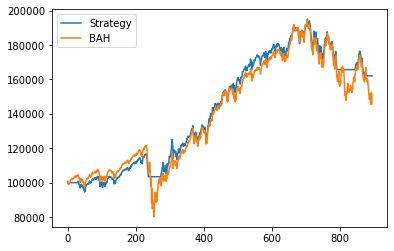

In [45]:
macd_bt.plot()

In [46]:
macd_bt.upload_to_dashboard("TrendFollower")

Data uploaded.


# Check on dashboard:
https://tigaji-algo-trade-dashboard-dashboard-gv8r0a.streamlitapp.com/